Penerapan Data Mining Untuk Klasifikasi Informasi Kecelakaan Lalu Lintas pada Twitter Menggunakan Metode Random Forest 

#Import Modul

In [ ]:
import numpy as np
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import string

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import nltk

#Load Dataset

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kulitekno","key":"7fbe76b44b7ebd042664d9da1a0c058a"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!kaggle datasets download -d dodyagung/accident

 98% 307M/313M [00:04<00:00, 100MB/s] 
100% 313M/313M [00:04<00:00, 79.9MB/s]


In [ ]:
zip_ref = zipfile.ZipFile('accident.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()

In [ ]:
!ls

accident.zip  files  kaggle.json  sample_data


#Change to Dataframe

In [ ]:
df = pd.read_csv('/content/files/twitter_label_manual.csv')

#Check dataset

In [ ]:
#to check shape of the dataset
print(df.shape) 

#to look the header of dataset
df

(1002, 6)


,id_str,created_at,crawled_at,screen_name,is_accident,full_text
0,1113976371515146240,2019-04-05 08:27:18,2020-02-08 12:30:29,mrahmatr7,1,"Rekaman CCTV Kecelakaan Motor di PIK, depan Ta..."
1,1114010329313206272,2019-04-05 10:42:14,2020-02-08 12:30:43,PanritaNews,1,"Tewaskan 346 Orang dalam 2 Kecelakaan, Boss Bo..."
2,1114037478237855745,2019-04-05 12:30:07,2020-02-08 12:30:56,VICE_ID,0,Anggota parlemen Taiwan juga berencana meningk...
3,1114121169873932288,2019-04-05 18:02:40,2020-02-08 12:31:38,OfficialSyariah,0,C.Gerakan.bicara pertolongan pertama pada kece...
4,1114149728323682305,2019-04-05 19:56:09,2020-02-08 12:31:54,AhliAsuransi,0,Asuransi mana nih??\n\nhttps://t.co/AJyABmimcY...
...,...,...,...,...,...,...
997,1241648950509047808,2020-03-22 15:52:33,2020-03-22 16:00:09,akun_b1j4k,0,"""Jatuh cinta itu adalah sebuah kecelakaan yang..."
998,1241721566016073728,2020-03-22 20:41:06,2020-03-22 20:45:09,officialFilza24,0,Pesan nasi goreng depan lapaknya ada kecelakaa...
999,1242306574887968768,2020-03-24 11:25:43,2020-03-24 11:30:10,sekitarbandung_,1,"Hati-hati, Lalin di Tol Purbaleunyi Baros KM 1..."
1000,1242347427262128128,2020-03-24 14:08:03,2020-03-24 14:15:08,ainaizt15,0,korang ada any idea tak macam mana nak bina sa...


In [ ]:
#get 5 data
new_df = df[:10]
new_df

,id_str,created_at,crawled_at,screen_name,is_accident,full_text
0,1113976371515146240,2019-04-05 08:27:18,2020-02-08 12:30:29,mrahmatr7,1,"Rekaman CCTV Kecelakaan Motor di PIK, depan Ta..."
1,1114010329313206272,2019-04-05 10:42:14,2020-02-08 12:30:43,PanritaNews,1,"Tewaskan 346 Orang dalam 2 Kecelakaan, Boss Bo..."
2,1114037478237855745,2019-04-05 12:30:07,2020-02-08 12:30:56,VICE_ID,0,Anggota parlemen Taiwan juga berencana meningk...
3,1114121169873932288,2019-04-05 18:02:40,2020-02-08 12:31:38,OfficialSyariah,0,C.Gerakan.bicara pertolongan pertama pada kece...
4,1114149728323682305,2019-04-05 19:56:09,2020-02-08 12:31:54,AhliAsuransi,0,Asuransi mana nih??\n\nhttps://t.co/AJyABmimcY...
5,1114202648356331520,2019-04-05 23:26:26,2020-02-08 12:32:11,RadioElshinta,1,23.27: @PTJASAMARGA : Kunciran KM 14 - KM 16 a...
6,1114211596711157761,2019-04-06 00:02:00,2020-02-08 12:32:15,detikcom,1,Terjadi kecelakaan truk muatan besar di Tol Ku...
7,1114430434694139904,2019-04-06 14:31:35,2020-02-08 12:33:11,adekrsnnd,0,"Plot twist: Ibunya abis kecelakaan, nemenin ke..."
8,1115096070793629696,2019-04-08 10:36:35,2020-02-08 12:47:30,TMC_Kebumen,0,UPDATE LAGI JADWAL SAMSAT KELILING DAN SAMSAT ...
9,1115167875721859072,2019-04-08 15:21:55,2020-02-08 12:48:12,noonalin2,0,Dapet video kejadian kecelakaan tunggal di Mar...


#Preprocessing data

In [ ]:
#Get just necessary atribut and label
new_df = new_df.drop(columns=['id_str', 'created_at', 'crawled_at', 'screen_name'])
new_df
for i,val in enumerate(new_df['full_text']):
  print(i, val)


0 Rekaman CCTV Kecelakaan Motor di PIK, depan Taman Grisenda :
https://t.co/gMHLep9IvZ mhmmdrhmtrmdhn
Visit Wonderful  #MRahmatRamadhan
1 Tewaskan 346 Orang dalam 2 Kecelakaan, Boss Boeing Minta Maaf https://t.co/wLRhFy8oYE
2 Anggota parlemen Taiwan juga berencana meningkatkan denda maksimum dan masa hukuman bagi orang yang menyetir dalam keadaan mabuk. https://t.co/GSWqziaKDN
3 C.Gerakan.bicara pertolongan pertama pada kecelakaan (P3K-BAKAT) https://t.co/jlPyXK3EBV
4 Asuransi mana nih??

https://t.co/AJyABmimcY

PPATK tidak memberikan rincian secara pasti siapa dan darimana asal partai caleg tersebut. Saat ini, pihaknya telah... https://t.co/AJyABmimcY
5 23.27: @PTJASAMARGA : Kunciran KM 14 - KM 16 arah Bitung PADAT, ada penanganan kecelakaan kendaraan truk fuso di bahu jalan.
6 Terjadi kecelakaan truk muatan besar di Tol Kunciran, Serpong arah Bitung. Akibatnya, terjadi kepadatan di lokasi kecelakaan. https://t.co/eeMnh9lZJa
7 Plot twist: Ibunya abis kecelakaan, nemenin ke UGD dan ba

In [ ]:
#remove link text and lower text		
new_df['full_text'] = new_df['full_text'].str.replace('http\S+|www.\S+', '', case=False).str.lower()
for i,val in enumerate(new_df['full_text']):
  print(i, val)

0 rekaman cctv kecelakaan motor di pik, depan taman grisenda :
 mhmmdrhmtrmdhn
visit wonderful  #mrahmatramadhan
1 tewaskan 346 orang dalam 2 kecelakaan, boss boeing minta maaf 
2 anggota parlemen taiwan juga berencana meningkatkan denda maksimum dan masa hukuman bagi orang yang menyetir dalam keadaan mabuk. 
3 c.gerakan.bicara pertolongan pertama pada kecelakaan (p3k-bakat) 
4 asuransi mana nih??



ppatk tidak memberikan rincian secara pasti siapa dan darimana asal partai caleg tersebut. saat ini, pihaknya telah... 
5 23.27: @ptjasamarga : kunciran km 14 - km 16 arah bitung padat, ada penanganan kecelakaan kendaraan truk fuso di bahu jalan.
6 terjadi kecelakaan truk muatan besar di tol kunciran, serpong arah bitung. akibatnya, terjadi kepadatan di lokasi kecelakaan. 
7 plot twist: ibunya abis kecelakaan, nemenin ke ugd dan baru bisa ditinggal.

tapi ya ga masalah sih. yg penting kan etika profesional. 
8 update lagi jadwal samsat keliling dan samsat desa
.
tertib bayar pajak yuk, 😁
.

In [ ]:
#remove punctuations, emoji, number, multiple space, and enter

new_df['full_text'] = new_df['full_text'].str.replace(r"[^a-zA-Z ]+", " ").str.strip().replace('\s+', ' ', regex=True)
for i,val in enumerate(new_df['full_text']):
  print(i, val)

0 rekaman cctv kecelakaan motor di pik depan taman grisenda mhmmdrhmtrmdhn visit wonderful mrahmatramadhan
1 tewaskan orang dalam kecelakaan boss boeing minta maaf
2 anggota parlemen taiwan juga berencana meningkatkan denda maksimum dan masa hukuman bagi orang yang menyetir dalam keadaan mabuk
3 c gerakan bicara pertolongan pertama pada kecelakaan p k bakat
4 asuransi mana nih ppatk tidak memberikan rincian secara pasti siapa dan darimana asal partai caleg tersebut saat ini pihaknya telah
5 ptjasamarga kunciran km km arah bitung padat ada penanganan kecelakaan kendaraan truk fuso di bahu jalan
6 terjadi kecelakaan truk muatan besar di tol kunciran serpong arah bitung akibatnya terjadi kepadatan di lokasi kecelakaan
7 plot twist ibunya abis kecelakaan nemenin ke ugd dan baru bisa ditinggal tapi ya ga masalah sih yg penting kan etika profesional
8 update lagi jadwal samsat keliling dan samsat desa tertib bayar pajak yuk stop pelanggaran stop kecelakaan keselamatan untuk
9 dapet video kej

In [ ]:
#removing stopwords
nltk.download('stopwords')
def stopword(sentence):
    review = [words for words in sentence.split() if words not in set(stopwords.words('indonesian'))]
    review = ' '.join(review)
    return review
print(stopwords.words('indonesian'))
new_df['full_text'] = new_df['full_text'].apply(stopword)
for i,val in enumerate(new_df['full_text']):
  print(i, val)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi', 'apatah', 'artinya', 'asal', 'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'bagai', 'bagaikan', 'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasanya', 'baik', 'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini', 'beginian', 'beginikah', 'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja', 'belakang', 'belakangan', 'belum', 'belumlah', 'benar', 'benarkah', 'benarlah', 'berada', 'berakhir', 'berakhirlah', 'berakhirnya', 'berapa', 'berapakah', 'berapalah', 'berapapun', 'berarti', 'berawal', 'berbagai', 'berdatan

In [ ]:
#stemming
!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

new_df['full_text'] = new_df['full_text'].apply(stemmer.stem)
for i,val in enumerate(new_df['full_text']):
  print(i, val)

     |████████████████████████████████| 215kB 7.5MB/s 
0 rekam cctv celaka motor pik taman grisenda mhmmdrhmtrmdhn visit wonderful mrahmatramadhan
1 tewas orang celaka boss boeing maaf
2 anggota parlemen taiwan rencana tingkat denda maksimum hukum orang setir mabuk
3 c gera bicara tolong celaka p k bakat
4 asuransi nih ppatk rincian darimana partai caleg
5 ptjasamarga kuncir km km arah bitung padat tangan celaka kendara truk fuso bahu jalan
6 celaka truk muat tol kuncir serpong arah bitung akibat padat lokasi celaka
7 plot twist ibu abis celaka nemenin ugd tinggal ya ga sih yg etika profesion
8 update jadwal samsat keliling samsat desa tertib bayar pajak yuk stop langgar stop celaka selamat
9 dapet video jadi celaka tunggal margonda depok pagi ya allah sedih liat liat yg ky gt ga rem tp sedih iya duka yg bawa kendara jgn lupa doa pergi hati patuh rambu yaa


In [ ]:
#tf-Idf vectorizer
vectorizer = TfidfVectorizer() 
vectorizer.fit_transform(new_df['full_text']) 
x = vectorizer.fit_transform(new_df['full_text']) 
y =  new_df['is_accident']


#bawah pengecekan
print(new_df['full_text'][:1])
# print(vectorizer.fit_transform(new_df['full_text'][:1]))
# summarize
print(vectorizer.vocabulary_)
# print(vectorizer.idf_)
# summarize encoded vector
print(x.shape)
i=0
print(0, x[0])
print(0, x[0].toarray())
print(1, x[1])
print(1, x[1].toarray())
print(2, x[2])
print(2, x[2].toarray())
print(3, x[3])
print(3, x[3].toarray())
print(4, x[4])
print(4, x[4].toarray())
print(5, x[5])
print(5, x[5].toarray())
print(6, x[6])
print(6, x[6].toarray())
print(7, x[7])
print(7, x[7].toarray())
print(8, x[8])
print(8, x[8].toarray())
print(9, x[9])
print(9, x[9].toarray())

0    rekam cctv celaka motor pik taman grisenda mhm...
Name: full_text, dtype: object
{'rekam': 71, 'cctv': 15, 'celaka': 16, 'motor': 52, 'pik': 65, 'taman': 83, 'grisenda': 28, 'mhmmdrhmtrmdhn': 51, 'visit': 98, 'wonderful': 99, 'mrahmatramadhan': 53, 'tewas': 86, 'orang': 57, 'boss': 13, 'boeing': 12, 'maaf': 47, 'anggota': 3, 'parlemen': 61, 'taiwan': 82, 'rencana': 73, 'tingkat': 88, 'denda': 19, 'maksimum': 49, 'hukum': 31, 'setir': 79, 'mabuk': 48, 'gera': 27, 'bicara': 10, 'tolong': 90, 'bakat': 7, 'asuransi': 5, 'nih': 56, 'ppatk': 67, 'rincian': 74, 'darimana': 18, 'partai': 62, 'caleg': 14, 'ptjasamarga': 69, 'kuncir': 41, 'km': 40, 'arah': 4, 'bitung': 11, 'padat': 58, 'tangan': 84, 'kendara': 39, 'truk': 92, 'fuso': 25, 'bahu': 6, 'jalan': 36, 'muat': 54, 'tol': 89, 'serpong': 78, 'akibat': 1, 'lokasi': 45, 'plot': 66, 'twist': 94, 'ibu': 32, 'abis': 0, 'nemenin': 55, 'ugd': 95, 'tinggal': 87, 'ya': 100, 'ga': 26, 'sih': 80, 'yg': 102, 'etika': 24, 'profesion': 68, 'update

#Data Split



In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
y_test

9    0
5    1
8    0
Name: is_accident, dtype: int64

# Random Forest Classifier

In [ ]:
classifier = RandomForestClassifier()
classifier.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#Model Analysis

In [ ]:
#making predictions
y_pred = classifier.predict(x_test)
#model accuracy
print("Model Accuracy : {}".format((y_pred == y_test).mean()))
#confusion matrix 
print(confusion_matrix(y_test,y_pred))

Model Accuracy : 1.0
[[2 0]
 [0 1]]


AttributeError: ignored

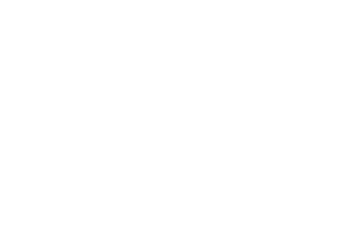

In [ ]:
from sklearn import tree
tree.plot_tree(classifier)

In [ ]:
text_representation = classifier.base_estimator_.tree_.node_count
print(text_representation)

AttributeError: ignored